In [1]:
# Analysis of results for method 1 - optimizing for noise
#     for the converted(not retrained) networks

In [2]:
# Questions:
#     1- how many times did the attack fail?
#     2- when it worked, how much noise was added?

In [3]:
from __future__ import print_function
import numpy as np
import os, sys, pickle

In [4]:
import matplotlib as mpl
# set this 'backend' when using jupyter; do this before importing pyplot
mpl.use('nbagg')
import matplotlib.pyplot as plt

In [35]:
# load a results pickle

hidden_layers = [1024]
exp_num = 1

print("{}_{}_{}".format('classic' ,hidden_layers, exp_num))
classic_pkl_loc = "./adversarial_results/bulk_mnist_adversarial_examples_Method1_{}_{}_{}.pkl".format('classic' ,hidden_layers, exp_num)
with open(classic_pkl_loc, "r") as f: 
    classic_adv_data_dict = pickle.load(f) 
    
print("{}_{}_{}".format('fgn' ,hidden_layers, exp_num))
fgn_pkl_loc = "./adversarial_results/bulk_mnist_adversarial_examples_Method1_{}_{}_{}.pkl".format('fgn' ,hidden_layers, exp_num)
with open(fgn_pkl_loc, "r") as f: 
    fgn_adv_data_dict = pickle.load(f) 

classic_[1024]_1
fgn_[1024]_1


In [36]:
fgn_adv_data_dict.keys()

['y_trues', 'xs', 'y_preds', 'y_preds_adversarial', 'noises']

In [37]:
# index of cases where y_pred == y_pred_adversarial
# (meaning the attack failed)
failed_attacks_ind_fgn = [ind for ind,(y_pred, y_pred_adversarial) 
                      in enumerate(zip(fgn_adv_data_dict['y_preds'],
                                       fgn_adv_data_dict['y_preds_adversarial']))
                      if y_pred == y_pred_adversarial]

failed_attacks_ind_classic = [ind for ind,(y_pred, y_pred_adversarial) 
                      in enumerate(zip(classic_adv_data_dict['y_preds'],
                                       classic_adv_data_dict['y_preds_adversarial']))
                      if y_pred == y_pred_adversarial]

In [38]:
# 1 - how many times did the attack fail?
print(len(failed_attacks_ind_fgn))
print(len(failed_attacks_ind_classic))

397
427


In [9]:
# # 2 - when it worked, how much noise was added?

In [39]:
successful_attacks_noises_fgn = [noise for ind,(noise, y_true, y_pred, y_pred_adversarial) 
                                        in enumerate(zip(fgn_adv_data_dict['noises'],
                                                         fgn_adv_data_dict['y_trues'],
                                                         fgn_adv_data_dict['y_preds'],
                                                         fgn_adv_data_dict['y_preds_adversarial']))
                                            if (y_true==y_pred) and (y_pred!=y_pred_adversarial)]


successful_attacks_noises_classic = [noise for ind,(noise, y_true, y_pred, y_pred_adversarial) 
                                        in enumerate(zip(classic_adv_data_dict['noises'],
                                                         classic_adv_data_dict['y_trues'],
                                                         classic_adv_data_dict['y_preds'],
                                                         classic_adv_data_dict['y_preds_adversarial']))
                                            if (y_true==y_pred) and (y_pred!=y_pred_adversarial)]

In [40]:
# number of succesful attacks
print(len(successful_attacks_noises_fgn))
print(len(successful_attacks_noises_classic))

3415
3450


<IPython.core.display.Javascript object>


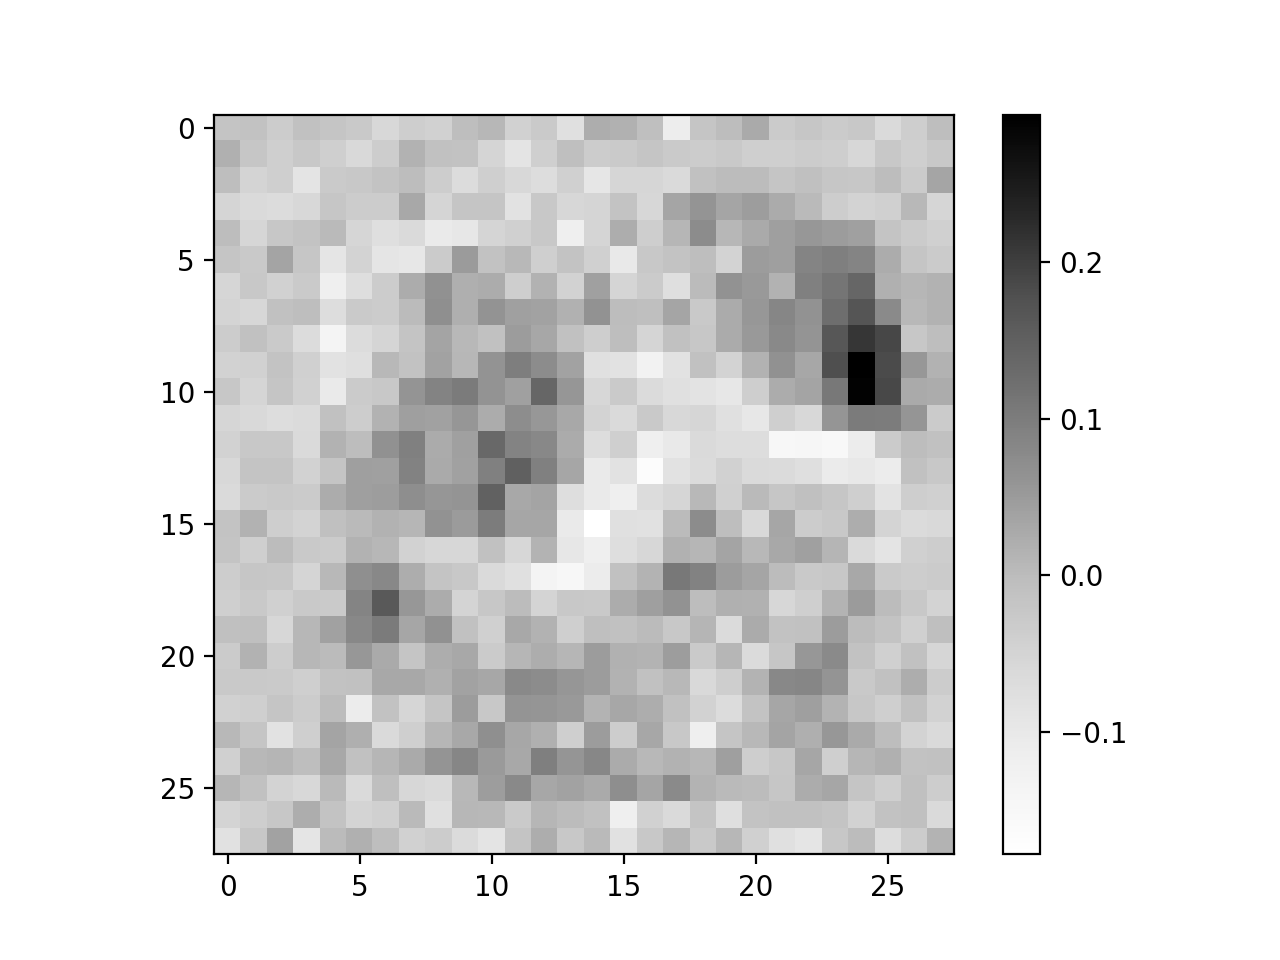

In [41]:
plt.imshow(successful_attacks_noises_fgn[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


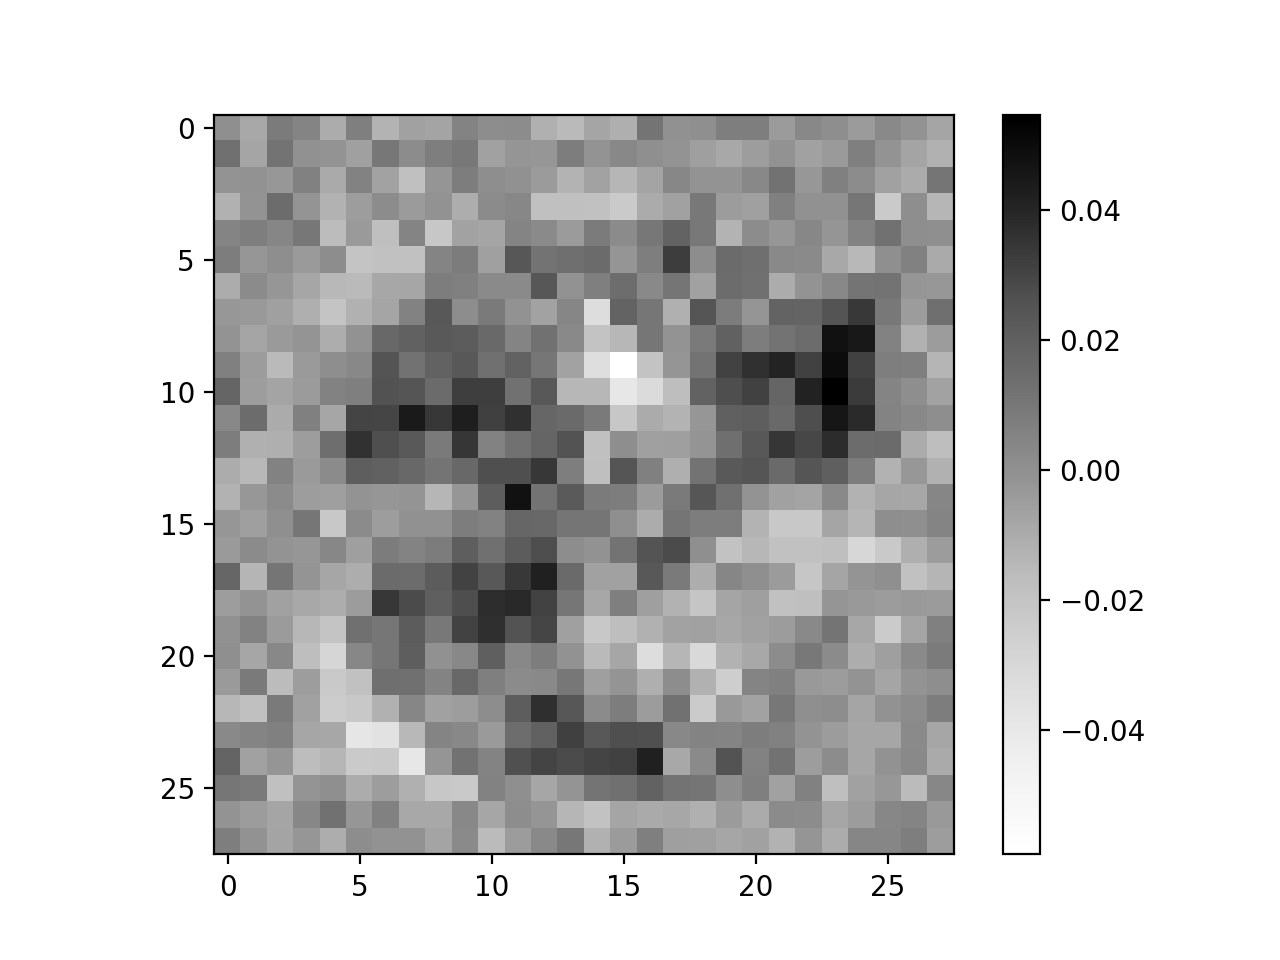

In [42]:
plt.imshow(successful_attacks_noises_classic[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


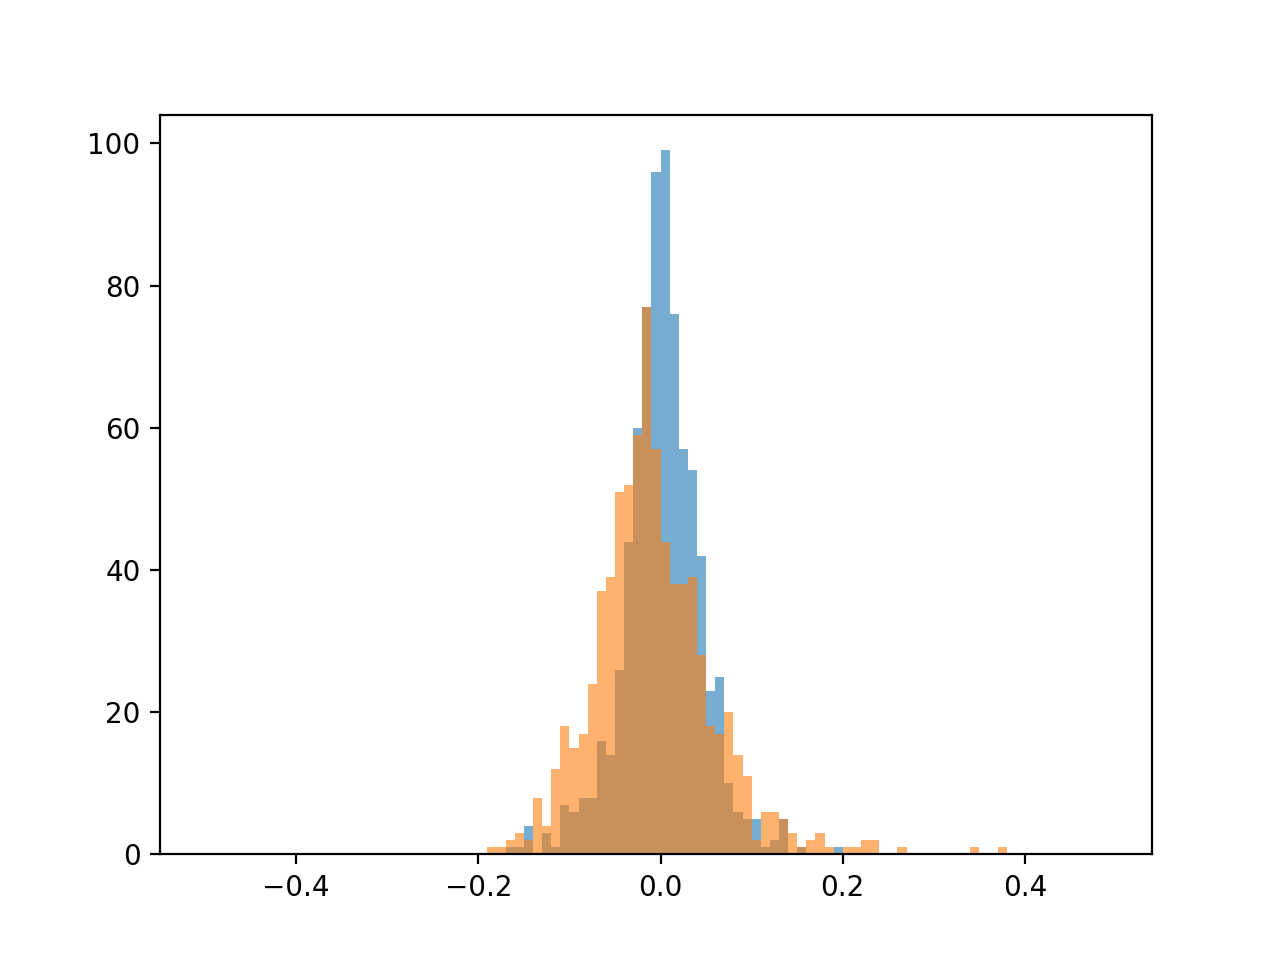

In [44]:
bins = np.arange(-0.5,0.5,0.01)
plt.hist(successful_attacks_noises_fgn[-1], bins=bins, alpha=0.6)
plt.hist(successful_attacks_noises_classic[-1], bins=bins, alpha=0.6)
plt.show()

In [17]:
print ("Noise: Mean, Max, Min: ")
successful_attacks_noises_fgn = np.abs(successful_attacks_noises_fgn)
print (np.mean(successful_attacks_noises_fgn, axis=-1), np.max(successful_attacks_noises_fgn), np.min(successful_attacks_noises_fgn))

Noise: Mean, Max, Min: 
0.023565901 0.30838484 2.442105e-09


In [16]:
print ("Noise: Mean, Max, Min: ")
successful_attacks_noises_classic = np.abs(successful_attacks_noises_classic)
print (np.mean(successful_attacks_noises_classic), np.max(successful_attacks_noises_classic), np.min(successful_attacks_noises_classic))

Noise: Mean, Max, Min: 
0.049405213 1.2214367 1.0074958e-08


In [29]:
# difference
np.mean(successful_attacks_noises_classic) - np.mean(successful_attacks_noises_fgn)

0.025839312

In [18]:
# number of failed attacks counts
failed_attacks_counts_fgn = []
failed_attacks_counts_classic = []

for exp_num in range(12):
    for hidden_layers in [[], [8], [128], [1024], [8,8], [128,128], [1024,1024], [8,8,8], [128,128,128], [1024,1024,1024]]:
        
        print("working on", str(hidden_layers), str(exp_num))
        # try loading results
        try:
            classic_pkl_loc = "./adversarial_results/bulk_mnist_adversarial_examples_Method1_{}_{}_{}.pkl".format('classic' ,hidden_layers, exp_num)
            with open(classic_pkl_loc, "r") as f: 
                classic_adv_data_dict = pickle.load(f) 

            fgn_pkl_loc = "./adversarial_results/bulk_mnist_adversarial_examples_Method1_{}_{}_{}.pkl".format('fgn' ,hidden_layers, exp_num)
            with open(fgn_pkl_loc, "r") as f: 
                fgn_adv_data_dict = pickle.load(f) 

            print("pickle files loaded")

        except:
            print("exp file does not exist")
            break

        # index of cases where y_pred == y_pred_adversarial
        # (meaning the attack failed)
        failed_attacks_fgn = [ind for ind,(y_pred, y_pred_adversarial) 
                              in enumerate(zip(fgn_adv_data_dict['y_preds'],
                                               fgn_adv_data_dict['y_preds_adversarial']))
                              if y_pred == y_pred_adversarial]

        failed_attacks_classic = [ind for ind,(y_pred, y_pred_adversarial) 
                              in enumerate(zip(classic_adv_data_dict['y_preds'],
                                               classic_adv_data_dict['y_preds_adversarial']))
                              if y_pred == y_pred_adversarial]

        print(len(failed_attacks_fgn))
        print(len(failed_attacks_classic))

        
        failed_attacks_counts_fgn.append(len(failed_attacks_fgn))
        failed_attacks_counts_classic.append(len(failed_attacks_classic))



working on [] 0
pickle files loaded
542
418
working on [8] 0
pickle files loaded
3932
454
working on [128] 0
pickle files loaded
3570
451
working on [1024] 0
pickle files loaded
411
377
working on [8, 8] 0
pickle files loaded
916
483
working on [128, 128] 0
pickle files loaded
518
495
working on [1024, 1024] 0
pickle files loaded
367
358
working on [8, 8, 8] 0
pickle files loaded
1105
539
working on [128, 128, 128] 0
pickle files loaded
418
431
working on [1024, 1024, 1024] 0
pickle files loaded
327
335
working on [] 1
pickle files loaded
538
434
working on [8] 1
pickle files loaded
3622
442
working on [128] 1
pickle files loaded
3413
445
working on [1024] 1
pickle files loaded
397
427
working on [8, 8] 1
pickle files loaded
934
463
working on [128, 128] 1
pickle files loaded
498
459
working on [1024, 1024] 1
pickle files loaded
360
404
working on [8, 8, 8] 1
pickle files loaded
610
530
working on [128, 128, 128] 1
pickle files loaded
482
464
working on [1024, 1024, 1024] 1
pickle file

<IPython.core.display.Javascript object>


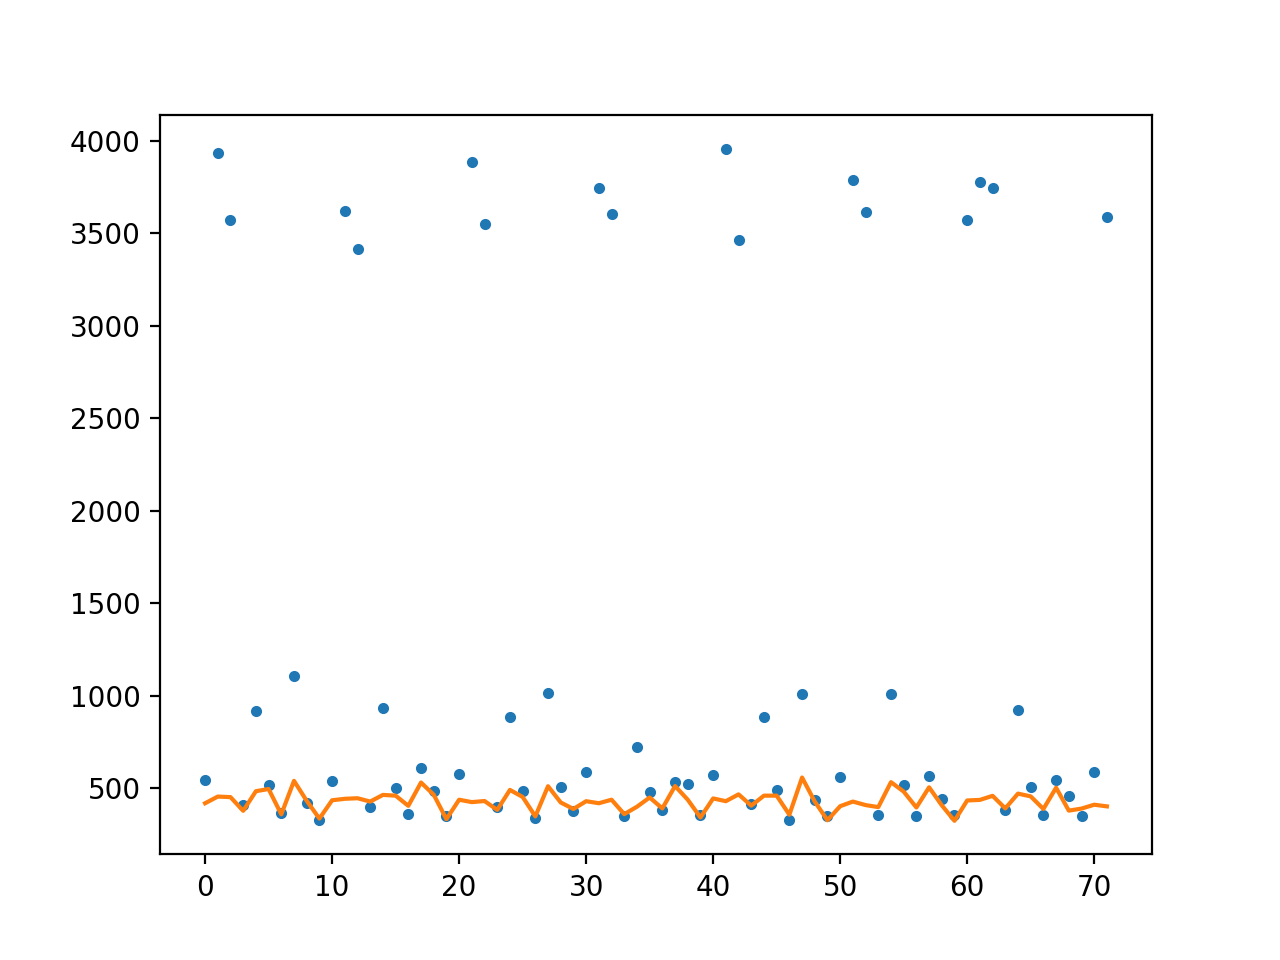

In [19]:
plt.plot(failed_attacks_counts_fgn,'.')
plt.plot(failed_attacks_counts_classic)

plt.show()

In [31]:
# noises for when the attack worked 
noise_differences = []

for exp_num in range(12):
    for hidden_layers in [[], [8], [128], [1024], [8,8], [128,128], [1024,1024], [8,8,8], [128,128,128], [1024,1024,1024]]:
        
        print("working on", str(hidden_layers), str(exp_num))
        # try loading results
        try:
            classic_pkl_loc = "./adversarial_results/bulk_mnist_adversarial_examples_Method1_{}_{}_{}.pkl".format('classic' ,hidden_layers, exp_num)
            with open(classic_pkl_loc, "r") as f: 
                classic_adv_data_dict = pickle.load(f) 

            fgn_pkl_loc = "./adversarial_results/bulk_mnist_adversarial_examples_Method1_{}_{}_{}.pkl".format('fgn' ,hidden_layers, exp_num)
            with open(fgn_pkl_loc, "r") as f: 
                fgn_adv_data_dict = pickle.load(f) 

            print("pickle files loaded")

        except:
            print("exp file does not exist")
            break
            
        # when it worked, how much noise was added?
        successful_attacks_noises_fgn = [noise for ind,(noise, y_true, y_pred, y_pred_adversarial) 
                                        in enumerate(zip(fgn_adv_data_dict['noises'],
                                                         fgn_adv_data_dict['y_trues'],
                                                         fgn_adv_data_dict['y_preds'],
                                                         fgn_adv_data_dict['y_preds_adversarial']))
                                            if (y_true==y_pred) and (y_pred!=y_pred_adversarial)]


        successful_attacks_noises_classic = [noise for ind,(noise, y_true, y_pred, y_pred_adversarial) 
                                                in enumerate(zip(classic_adv_data_dict['noises'],
                                                                 classic_adv_data_dict['y_trues'],
                                                                 classic_adv_data_dict['y_preds'],
                                                                 classic_adv_data_dict['y_preds_adversarial']))
                                                    if (y_true==y_pred) and (y_pred!=y_pred_adversarial)]
        
        difference = np.mean(np.abs(successful_attacks_noises_classic))-np.mean(np.abs(successful_attacks_noises_fgn))
        
        print(difference)
        
        noise_differences.append(difference)
            
        

working on [] 0
pickle files loaded
-0.0012729727
working on [8] 0
pickle files loaded
0.023172792
working on [128] 0
pickle files loaded
0.025646068
working on [1024] 0
pickle files loaded
-0.00059940666
working on [8, 8] 0
pickle files loaded
0.0041572116
working on [128, 128] 0
pickle files loaded
-0.0013539344
working on [1024, 1024] 0
pickle files loaded
-0.0017418899
working on [8, 8, 8] 0
pickle files loaded
0.005145915
working on [128, 128, 128] 0
pickle files loaded
-0.0026569553
working on [1024, 1024, 1024] 0
pickle files loaded
-0.0021603927
working on [] 1
pickle files loaded
-0.00051799417
working on [8] 1
pickle files loaded
0.027269851
working on [128] 1
pickle files loaded
0.025839312
working on [1024] 1
pickle files loaded
-0.000728976
working on [8, 8] 1
pickle files loaded
0.0046831034
working on [128, 128] 1
pickle files loaded
-0.0016485788
working on [1024, 1024] 1
pickle files loaded
-0.00010640174
working on [8, 8, 8] 1
pickle files loaded
0.00015928224
working

<IPython.core.display.Javascript object>


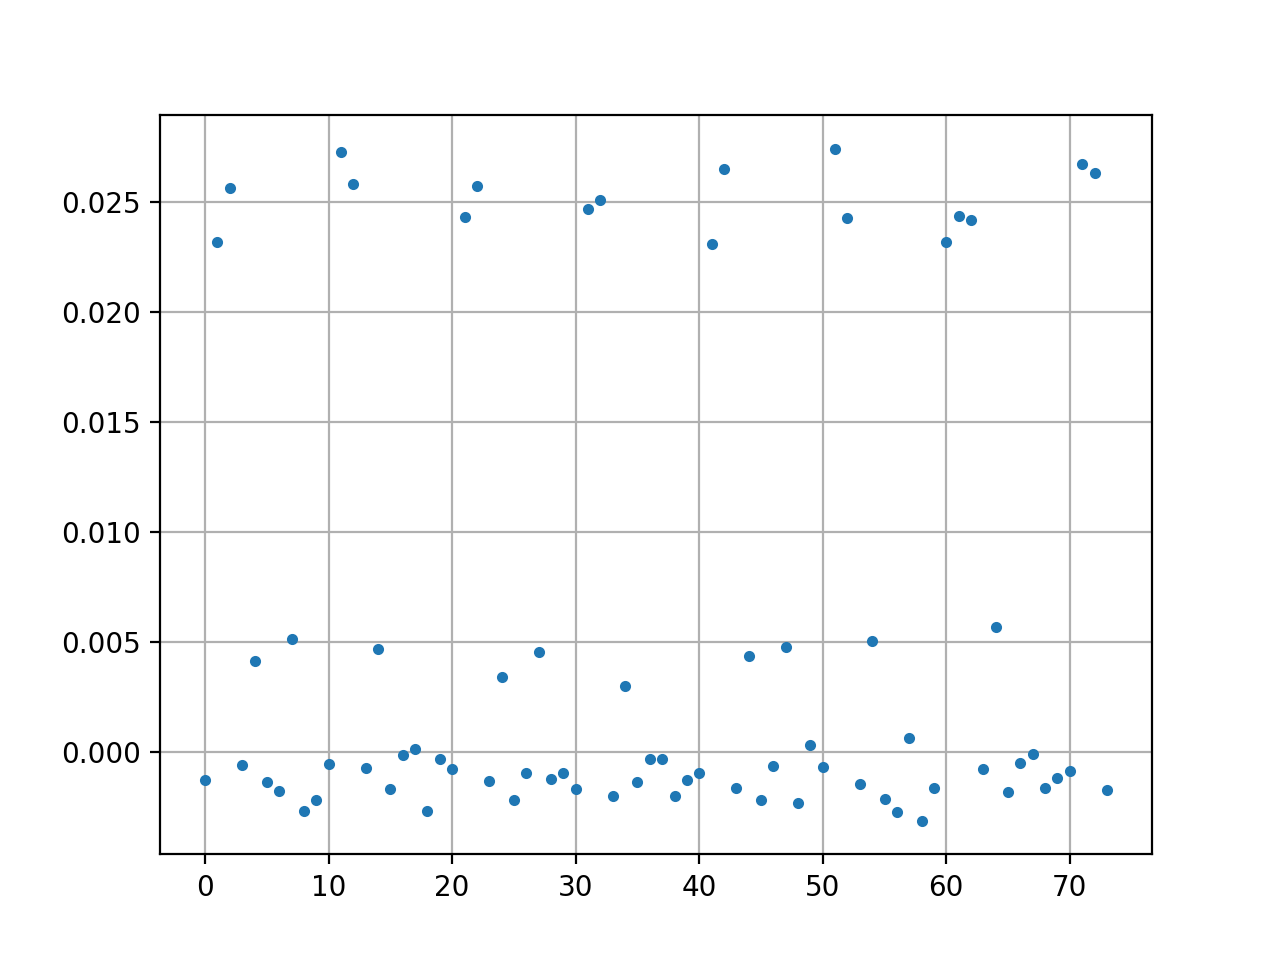

In [34]:
plt.plot(noise_differences, '.')
plt.grid()
plt.show()